# Probability and Statistics in Python 

In this dataset, we will describe and understand the dataset using Pthon python Probability and Statistics libraries. We are going to work on FiveThirtyEight team dataset on Movies critics scores and site's user scores. These scores are aggregated and the average score from both groups are included for each movie. We will be working on fandango_score_comparison.csv, which you can download from FiveThirtyEight Github repo. 

Here are some of the columns in the dataset:

FILM - film name.

RottenTomatoes - Rotten Tomatoes critics average score.

RottenTomatoes_User - Rotten Tomatoes user average score.

RT_norm - Rotten Tomatoes critics average score (normalized to a 0 to 5 point scale).

RT_user_norm - Rotten Tomatoes user average score (normalized to a 0 to 5 point scale).

Metacritic - Metacritic critics average score.

Metacritic_user_nom - Metacritic user average score (normalized to a 0 to 5 point scale).

Metacritic_norm - Metacritic critics average score (normalized to a 0 to 5 point scale).

Fandango_Ratingvalue - Fandango user average score (0 to 5 stars).

IMDB_norm - IMDB user average score (normalized to a 0 to 5 point scale).

Lets focus on the normalized user scores for now and generate histograms to better understand each sites distributions.


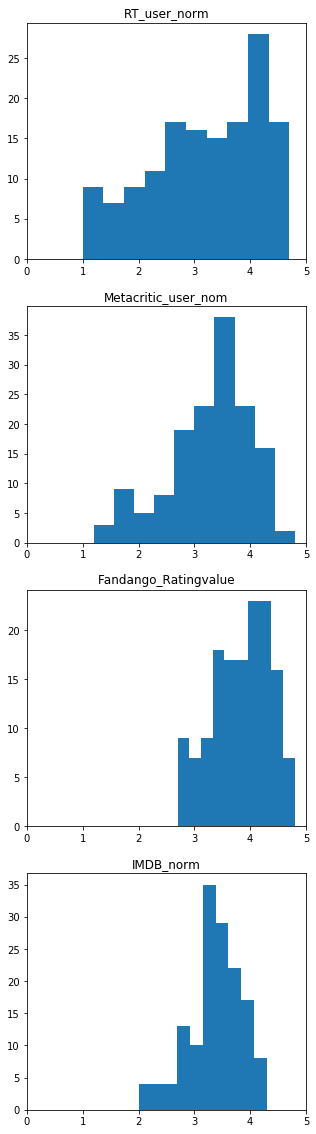

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
movie_reviews = pd.read_csv("Probability_and_Statistics_in_Python\\fandango_score_comparison.csv")

cols = ['RT_user_norm','Metacritic_user_nom','Fandango_Ratingvalue','IMDB_norm']
fig = plt.figure(figsize=(5,20))
for i in range(1,5):
    ax = fig.add_subplot(4,1,i)
    ax.hist(movie_reviews[cols[i-1]])
    ax.set_xlim(0,5)
    ax.set_title(cols[i-1])
  




3.1938356164383572 3.2595890410958885 3.8452054794520483 3.3684931506849316


In [40]:
# calculate mean, variance and standard deviation 
import pandas as pd



def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    variances = [(i - mean) ** 2 for i in series]
    varaince = sum(variances)/len(variances)
    return varaince
    
def calc_sd(variance):
    sd = (variance ** (1/2))
    return sd

columns =["RT_user_norm","Metacritic_user_nom","Fandango_Ratingvalue","IMDB_norm"]


rt_mean = movie_reviews["RT_user_norm"].mean()
mc_mean = movie_reviews["Metacritic_user_nom"].mean()
fg_mean = movie_reviews["Fandango_Ratingvalue"].mean()
id_mean = movie_reviews["IMDB_norm"].mean()

var_columns = [calc_variance(movie_reviews[value]) for value in columns]
sd_columns = [calc_sd(var_columns[idx]) for idx,value in enumerate(columns)]
    
rt_var =  var_columns[0]  
mc_var =  var_columns[1] 
fg_var =  var_columns[2] 
id_var =  var_columns[3] 

rt_stdev =  sd_columns[0]  
mc_stdev =  sd_columns[1] 
fg_stdev =  sd_columns[2] 
id_stdev =  sd_columns[3] 

print("Rotten Tomatoes (mean):", rt_mean)
print("Metacritic (mean):", mc_mean)
print("Fandango (mean):", fg_mean)
print("IMDB (mean):", rt_mean)

print(" ")

print("Rotten Tomatoes (variance):", rt_var)
print("Metacritic (variance):", mc_var)
print("Fandango (variance):", fg_var)
print("IMDB (variance):", id_var)

print(" ")

print("Rotten Tomatoes (standard deviation):", rt_stdev)
print("Metacritic (standard deviation):", mc_stdev)
print("Fandango (standard deviation):", fg_stdev)
print("IMDB (standard deviation):", id_stdev)

Rotten Tomatoes (mean): 3.1938356164383572
Metacritic (mean): 3.2595890410958885
Fandango (mean): 3.8452054794520483
IMDB (mean): 3.1938356164383572
 
Rotten Tomatoes (variance): 0.995578438731
Metacritic (variance): 0.566654625633
Fandango (variance): 0.251107149559
IMDB (variance): 0.228219647213
 
Rotten Tomatoes (standard deviation): 0.997786770173
Metacritic (standard deviation): 0.752764654878
Fandango (standard deviation): 0.501105926486
IMDB (standard deviation): 0.47772340032


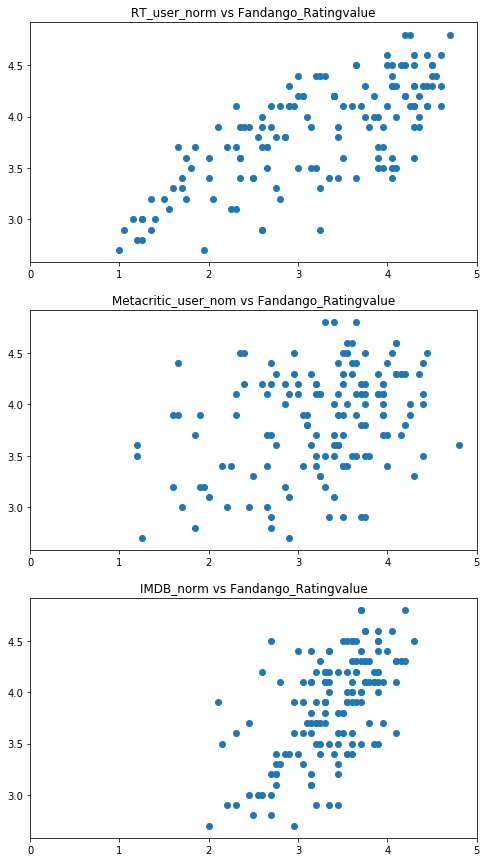

In [53]:
# generating scatter plots
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(8,15))
y = "Fandango_Ratingvalue"
x = ["RT_user_norm","Metacritic_user_nom","IMDB_norm"]
for i in range(1,4):
    ax = fig.add_subplot(3,1,i)
    ax.set_xlim(0,5)
    ax.scatter(movie_reviews[x[i-1]],movie_reviews[y])
    ax.set_title(x[i-1]+" vs "+y)


In [58]:
# calculate covariance for above series objects

def calc_covariance(series1,series2):
    
    values1 = series1.values
    values2 = series2.values
    
    mean1 = sum(values1)/len(values1)
    mean2 = sum(values2)/len(values2)
    
    variance1 = [i-mean1 for i in values1]
    variance2 = [i-mean2 for i in values2]
    
    covariances = [variance1[i]*variance2[i] for i in range(len(variance1))]
    covariance = sum(covariances)/len(covariances)
    
    return covariance


rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"],movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"],movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"],movie_reviews["Fandango_Ratingvalue"])

print("Covariance between Rotten Tomatoes and Fandango:", rt_fg_covar)
print("Covariance between Metacritic and Fandango", mc_fg_covar)
print("Covariance between IMDB and Fandango", id_fg_covar)


Covariance between Rotten Tomatoes and Fandango: 0.362162225558
Covariance between Metacritic and Fandango 0.127100769375
Covariance between IMDB and Fandango 0.143718802777


In [91]:
# calculate coorelation for above series objects



def cal_mean(series):
    vals = series.values
    mean = sum(vals)/len(vals)
    return mean

def calc_variance(series):
    mean = cal_mean(series)
    #vals = series.values
    variances = [(i-mean) ** 2 for i in series]
    variance = sum(variances)/len(variances)
    return variance

def cal_sd(series):
    variance = calc_variance(series)
    return (variance ** (1/2))

def cal_covariance(series1,series2):
        
    values1 = series1.values
    values2 = series2.values
    
    mean1 = cal_mean(series1)
    mean2 = cal_mean(series2)
    
    variance1 = [i-mean1 for i in values1]
    variance2 = [i-mean2 for i in values2]
    
    covariances = [variance1[i]*variance2[i] for i in range(len(variance1))]
    covariance = sum(covariances)/len(covariances)
    
    return covariance

def calc_correlation(series1,series2):
    covariance = cal_covariance(series1,series2)
    sd1 = cal_sd(series1)
    sd2 = cal_sd(series2)
    correlation = covariance/(sd1*sd2)
    return correlation

rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Correlation between Rotten Tomatoes and Fandango", rt_fg_corr)
print("Correlation between Metacritic and Fandango", mc_fg_corr)
print("Correlation between IMDB and Fandango", id_fg_corr)


    




Correlation between Rotten Tomatoes and Fandango 0.724328994249
Correlation between Metacritic and Fandango 0.336945314265
Correlation between IMDB and Fandango 0.600354177263
